<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Indicadores_Macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Obtendo as bibliotecas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as wb
from functools import reduce
import quandl

! pip install pandas_datareader #Baixar dados de ativos financeiros --> API KEY: YGR9cxTVqxTZLyUTGMcC
! pip install quandl            #Baixar dados macroeconomicos.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Utilizxando a biblioteca Quadl
quandl.ApiConfig.api_key = "YGR9cxTVqxTZLyUTGMcC"

In [0]:
#Outra forma de utilizar a biblioteca sem mostrar a minha senha ca celula.
#Salvar a senha em um arquivo .txt no repositório.


#f = open("senha.txt", "r")
#token = f.read()

#Petróleo

In [0]:
#Petróleo WTI

wti_crude = quandl.get("EIA/PET_RWTC_D", star_date = "2000-01-01")

In [5]:
type(wti_crude)

pandas.core.frame.DataFrame

In [6]:
wti_crude.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [7]:
wti_crude.rename(columns={"Value":"Petroleo"}, inplace =True)
wti_crude.head()

,Petroleo
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


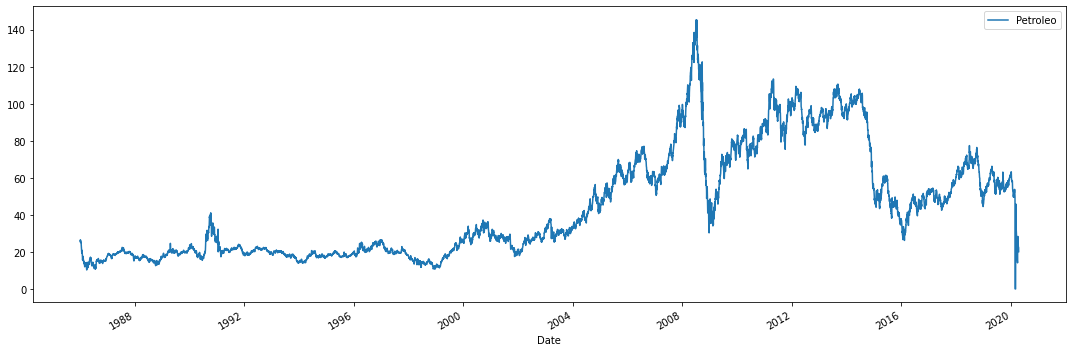

In [8]:
wti_crude.plot(figsize=(15,5))
plt.tight_layout();

#PIB dos EUA

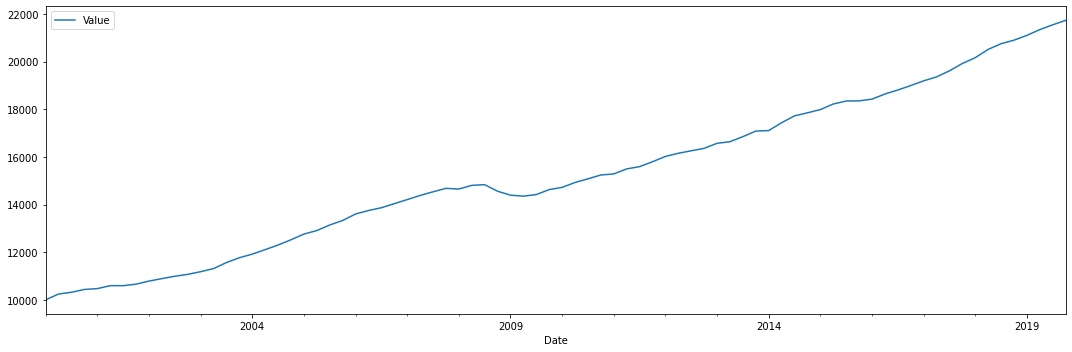

In [9]:
PIB_US = quandl.get("FRED/GDP", start_date = "2000-01-01")
PIB_US.plot(figsize=(15,5))
plt.tight_layout();

#Taxa Selic

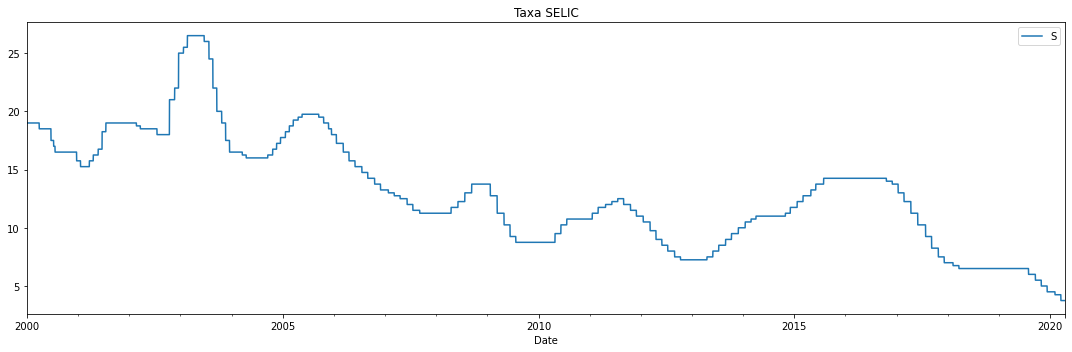

In [10]:
selic = quandl.get("BCB/432", start_date = "2000-01-01")
selic.plot(figsize=(15,5))
plt.title("Taxa SELIC")
plt.legend("SELIC")
plt.tight_layout();

#IPCA

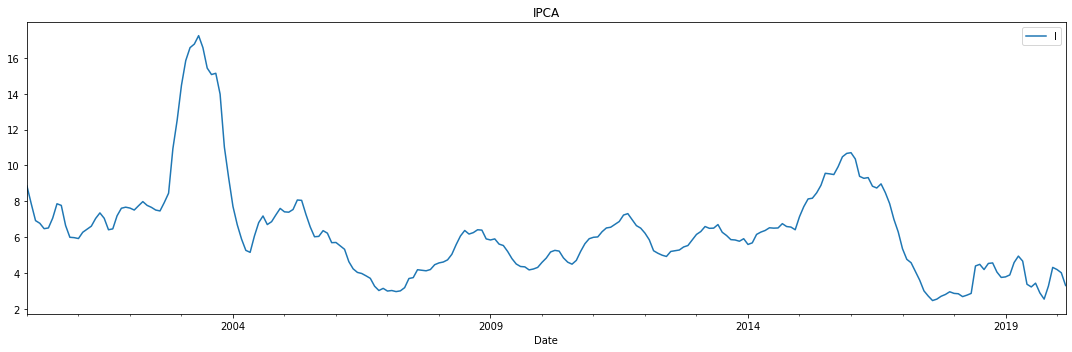

In [11]:
ipca = quandl.get("BCB/13522", start_date = "2000-01-01")
ipca.plot(figsize=(15,5))
plt.title("IPCA")
plt.legend("IPCA")
plt.tight_layout();

#PIB Brasil

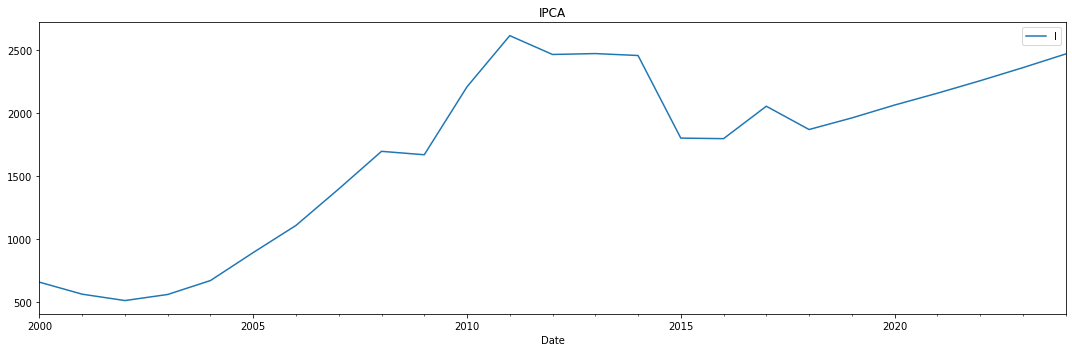

In [12]:
PIB_BRASIL = quandl.get("ODA/BRA_NGDPD", start_date = "2000-01-01")
PIB_BRASIL.plot(figsize=(15,5))
plt.title("IPCA")
plt.legend("IPCA")
plt.tight_layout();

#Dólar

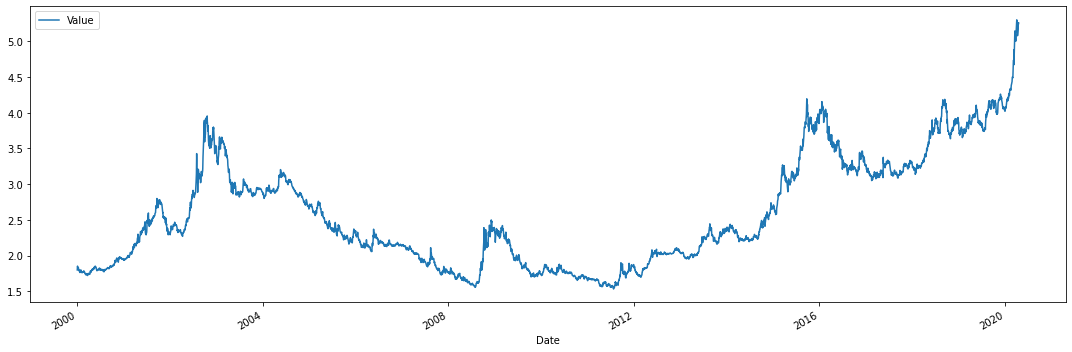

In [13]:
dolar = quandl.get("BCB/10813", start_date = "2000-01-01")
dolar.plot(figsize=(15,5))

plt.tight_layout();

#Ouro

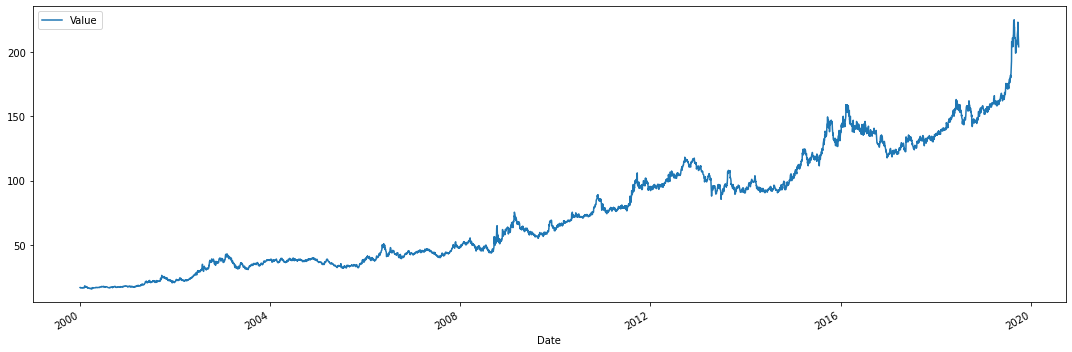

In [14]:
ourobr = quandl.get("BCB/4", start_date = "2000-01-01")
ourobr.plot(figsize=(15,5))
#oz2d
plt.tight_layout();

#CDI

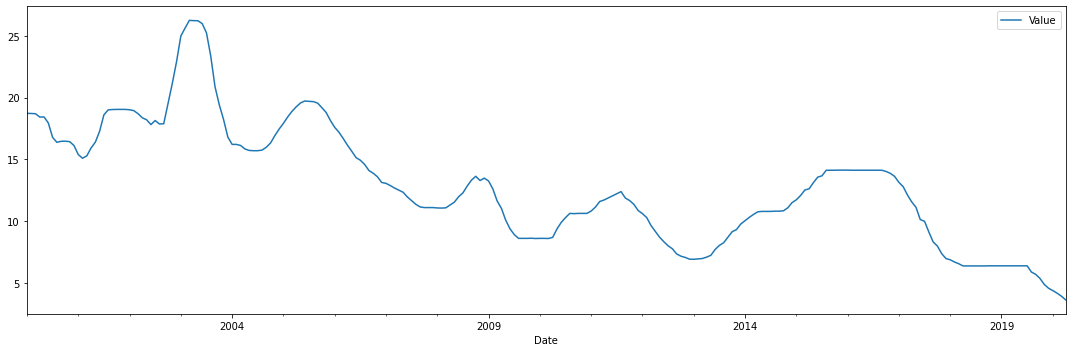

In [15]:
cdi = quandl.get("BCB/4392", start_date = "2000-01-01")
cdi.plot(figsize=(15,5))

plt.tight_layout();

In [0]:
data_frame = [ wti_crude, dolar, ipca, selic, ourobr, cdi, selic]
data_junto = reduce(lambda left, right: pd.merge(left, right, on = ["Date"], how = "inner"), data_frame)

In [17]:
data_junto.head()

,Petroleo,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y
Date,,,,,,,
2000-01-31,27.65,1.8016,8.85,19.0,16.60,18.73,19.0
2000-02-29,30.57,1.7677,7.86,19.0,16.83,18.72,19.0
2000-03-31,26.86,1.7465,6.92,18.5,15.95,18.70,18.5
2000-05-31,29.03,1.8258,6.47,18.5,16.95,18.44,18.5
2000-06-30,32.44,1.7992,6.51,17.5,17.60,17.95,17.5


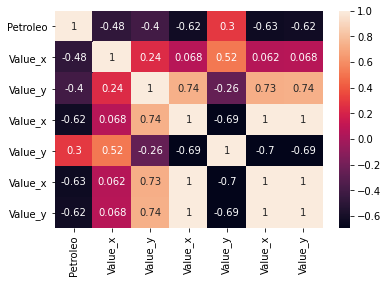

In [18]:
sns.heatmap(data_junto.corr(), annot = True)

#Dados de Marcado Financeiro.

In [27]:
petr4 = wb.DataReader("PETR4.SA", data_source = "yahoo", start = "2010-01-01")
petr4.rename(columns = {"Adj Close":"PETR4"}, inplace = True)
petr4 = petr4.drop(petr4.columns[[0,1,2,3,4]], axis= 1)
petr4

,PETR4
Date,
2010-01-04,31.198471
2010-01-05,30.930965
2010-01-06,31.348946
2010-01-07,31.056356
2010-01-08,30.889164
...,...
2020-04-13,16.930000
2020-04-14,16.730000
2020-04-15,16.379999


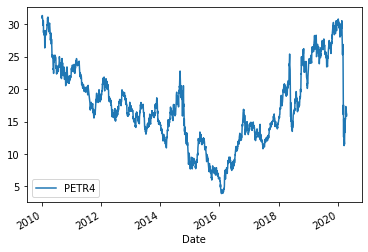

In [28]:
petr4.plot();

In [0]:
sp500 = wb.DataReader("^GSPC", data_source = "yahoo", start = "2010-01-01")
sp500.rename(columns = {"Adj Close":"SP500"}, inplace = True)
sp500 = sp500.drop(sp500.columns[[0,1,2,3,4]], axis= 1)

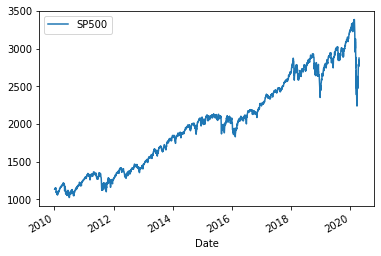

In [30]:
sp500.plot()

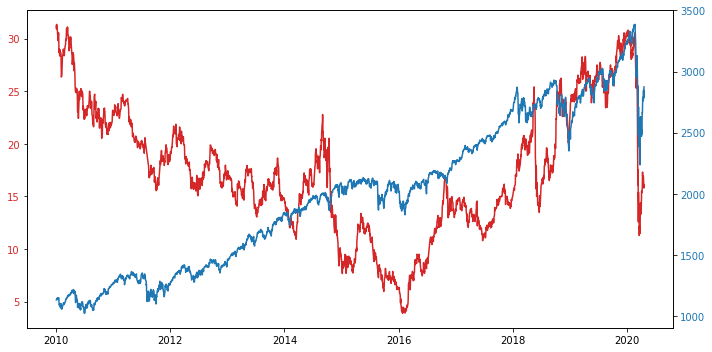

In [34]:
fig, ax1 = plt.subplots(figsize = (10,5))

color = "tab:red"
ax1.plot(petr4, color=color)
ax1.tick_params(axis= "y", labelcolor = color)

ax2=ax1.twinx() # configurar mesmo eixo veetical que compartila o mesmo eixo x

color= "tab:blue"
ax2.plot(sp500, color = color)
ax2.tick_params(axis = "y", labelcolor = color)

plt.tight_layout()


In [0]:
#mais de um ativo de uma vez

acoes =["PETR4.SA", "GOLL4.SA", "VALE3.SA", "ITSA3.SA"]
df = pd.DataFrame()
for acoes in acoes:
  df[acoes] = wb.DataReader(acoes, data_source= "yahoo", start="2010-01-01")["Adj Close"]
  

In [59]:
df.head()

,PETR4.SA,GOLL4.SA,VALE3.SA,ITSA3.SA
Date,,,,
2010-01-04,31.198471,25.250458,34.636238,4.651698
2010-01-05,30.930965,25.039238,34.959122,4.662305
2010-01-06,31.348946,25.327267,35.699070,4.609286
2010-01-07,31.056356,25.596092,35.847065,4.662305
2010-01-08,30.889164,26.834614,36.196857,5.185058


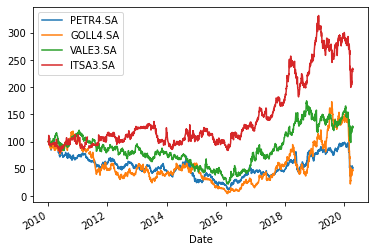

In [60]:
#normalizacao
(df/df.iloc[0]*100).plot()

In [0]:
  #cruzando todos os dados
data_frame = [ wti_crude, dolar, ipca, selic, ourobr, cdi, selic, df]
data_junto1 = reduce(lambda left, right: pd.merge(left, right, on = ["Date"], how = "inner"), data_frame)

In [64]:
data_junto1.head()

,Petroleo,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,PETR4.SA,GOLL4.SA,VALE3.SA,ITSA3.SA
Date,,,,,,,,,,,
2010-03-31,83.45,1.7802,5.17,8.75,68.00,8.61,8.75,29.585051,22.103943,38.443604,4.317696
2010-04-30,86.07,1.7298,5.26,9.50,69.00,8.70,9.50,27.528172,22.896910,35.972687,4.257483
2010-06-30,75.59,1.8007,4.84,10.25,74.10,9.91,10.25,22.682701,21.192030,29.570765,4.052601
2010-08-31,71.93,1.7552,4.49,10.75,73.75,10.64,10.75,22.142275,22.500427,31.758938,4.458053
2010-09-30,79.95,1.6934,4.70,10.75,74.30,10.62,10.75,23.187366,25.721853,35.430721,4.625498


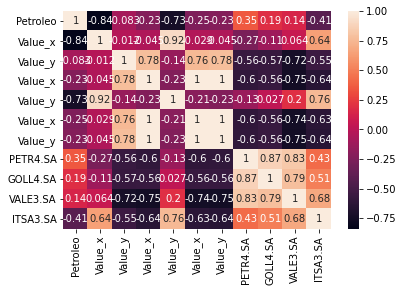

In [65]:
sns.heatmap(data_junto1.corr(), annot = True)

[Text(0.5, 0, 'Petroleo'),
 Text(1.5, 0, 'Value_x'),
 Text(2.5, 0, 'Value_y'),
 Text(3.5, 0, 'Value_x'),
 Text(4.5, 0, 'Value_y'),
 Text(5.5, 0, 'Value_x'),
 Text(6.5, 0, 'Value_y'),
 Text(7.5, 0, 'PETR4.SA'),
 Text(8.5, 0, 'GOLL4.SA'),
 Text(9.5, 0, 'VALE3.SA'),
 Text(10.5, 0, 'ITSA3.SA')]

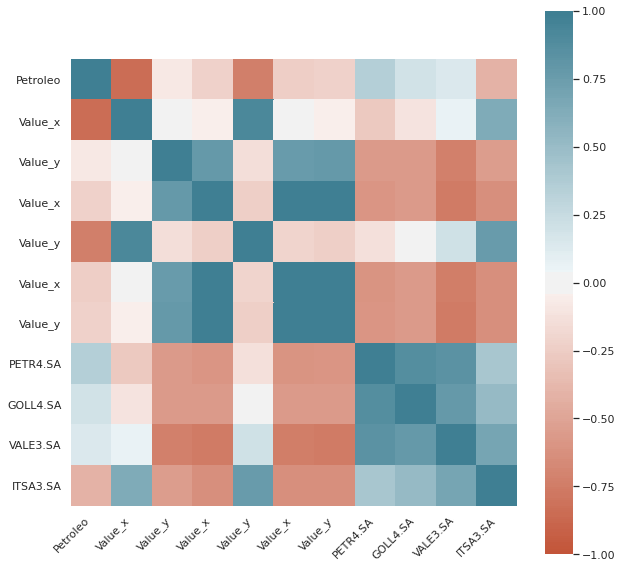

In [84]:
sns.set(font_scale=1)

corr = data_junto1.corr()
plt.figure(figsize=(10,10))
ax= sns.heatmap(corr, vmin=-1, vmax=1, center=0,  cmap = sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = "right")

In [85]:
data_junto1.corr()

,Petroleo,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,PETR4.SA,GOLL4.SA,VALE3.SA,ITSA3.SA
Petroleo,1.000000,-0.838035,-0.083064,-0.225037,-0.731867,-0.247460,-0.225037,0.354273,0.190388,0.144137,-0.408993
Value_x,-0.838035,1.000000,-0.012388,-0.045198,0.919342,-0.028569,-0.045198,-0.269525,-0.114502,0.063804,0.642964
Value_y,-0.083064,-0.012388,1.000000,0.780831,-0.143357,0.759332,0.780831,-0.558845,-0.568987,-0.723898,-0.546392
Value_x,-0.225037,-0.045198,0.780831,1.000000,-0.232629,0.996024,1.000000,-0.599955,-0.560748,-0.750034,-0.639679
Value_y,-0.731867,0.919342,-0.143357,-0.232629,1.000000,-0.205410,-0.232629,-0.129836,0.026965,0.198988,0.758010
Value_x,-0.247460,-0.028569,0.759332,0.996024,-0.205410,1.000000,0.996024,-0.603062,-0.564979,-0.743077,-0.625683
Value_y,-0.225037,-0.045198,0.780831,1.000000,-0.232629,0.996024,1.000000,-0.599955,-0.560748,-0.750034,-0.639679
PETR4.SA,0.354273,-0.269525,-0.558845,-0.599955,-0.129836,-0.603062,-0.599955,1.000000,0.870979,0.829517,0.429521
GOLL4.SA,0.190388,-0.114502,-0.568987,-0.560748,0.026965,-0.564979,-0.560748,0.870979,1.000000,0.785248,0.509822
VALE3.SA,0.144137,0.063804,-0.723898,-0.750034,0.198988,-0.743077,-0.750034,0.829517,0.785248,1.000000,0.681934
